In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
import scipy

In [3]:
df=pd.read_csv('Rainfall.csv')
df=pd.DataFrame(data=df)
df.head().transpose()

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28.0,32.3
Rainfall,0.6,0.0,0.0,0.0,1.0
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44.0,44.0,46.0,24.0,41.0
WindDir9am,W,NNW,W,SE,ENE


In [4]:
df.tail().transpose()

,8420,8421,8422,8423,8424
Date,2017-06-21,2017-06-22,2017-06-23,2017-06-24,2017-06-25
Location,Uluru,Uluru,Uluru,Uluru,Uluru
MinTemp,2.8,3.6,5.4,7.8,14.9
MaxTemp,23.4,25.3,26.9,27.0,NaN
Rainfall,0.0,0.0,0.0,0.0,0.0
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,E,NNW,N,SE,NaN
WindGustSpeed,31.0,22.0,37.0,28.0,NaN
WindDir9am,SE,SE,SE,SSE,ESE


In [5]:
df.sample()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
4692,2010-03-26,Melbourne,14.8,30.7,0.0,9.6,7.2,N,50.0,N,...,42.0,52.0,1016.6,1016.9,5.0,7.0,22.4,24.7,No,No


In [6]:
df.shape

(8425, 23)

In [7]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [10]:
df=df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm','Location','Date'],axis=1)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [11]:
df=df.dropna(axis=0)
df.shape

(6332, 17)

In [12]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [13]:
#lets do label encoder to change object data into numerical data

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindGustDir'])
df['WindDir3pm'] = le.fit_transform(df['WindGustDir'])
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

In [14]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13,44.0,13,13,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,14,44.0,14,14,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,15,46.0,15,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,4,24.0,4,4,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,13,41.0,13,13,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [15]:
x=df.drop(['RainTomorrow'],axis=1)
y=df['RainTomorrow']

In [16]:
x.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,13,44.0,13,13,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0
1,7.4,25.1,0.0,14,44.0,14,14,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0
2,12.9,25.7,0.0,15,46.0,15,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0
3,9.2,28.0,0.0,4,24.0,4,4,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0
4,17.5,32.3,1.0,13,41.0,13,13,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0


In [17]:
x.shape

(6332, 16)

In [18]:
y.shape

(6332,)

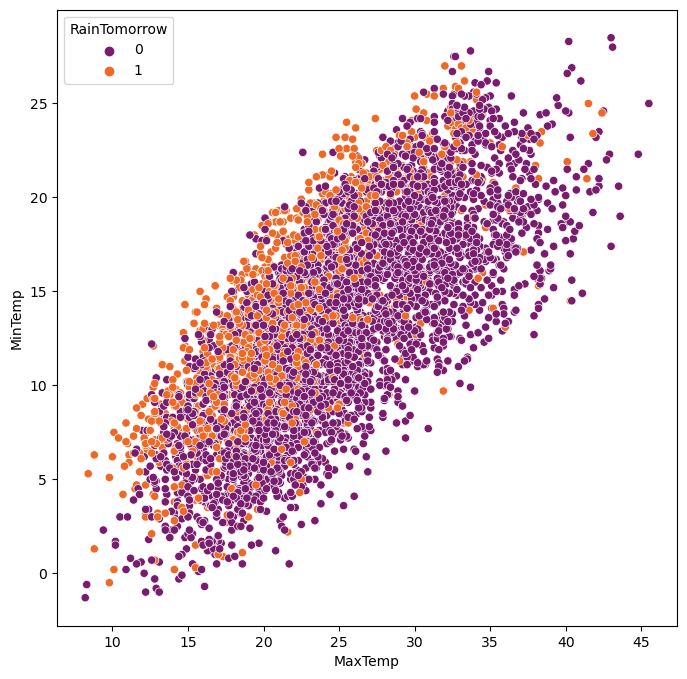

In [19]:
#lets do visualization of this dataset

plt.figure(figsize=(8,8))

sns.scatterplot(x='MaxTemp',y='MinTemp',hue='RainTomorrow',palette='inferno',data=df)
plt.show()

so as you can see this is the graph that we can see now and i'm getting a very good idea that as the minimum temperature increasing the maximum temperature is increasing so as you can see it is a linear form only it is a cluster but it is following a linear form a linear relationship especially this .this orange dots. they are the dots that represent it is going to rain tomorrow right so as the minimum temperature versus the maximum temperature.

0 means not rain going tomorrow.


1 means rain going to tomorrow.


lets draw one more graph on humidity and temperature

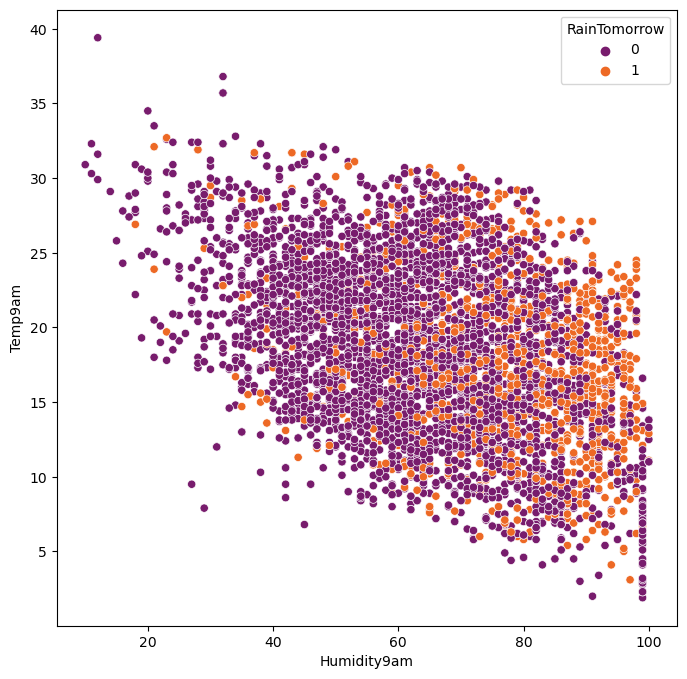

In [20]:
plt.figure(figsize=(8,8))

sns.scatterplot(x='Humidity9am',y='Temp9am',hue='RainTomorrow',palette='inferno',data=df)
plt.show()

as we can see that orange dots less than the voilet dots. it's mean rain tomorrow are very less in quantity than not going to rain tomorrow. we're getting a very good relationship as the humidity increasing and the temperature also get increasing so the probability of the rain tomorrow is getting high.

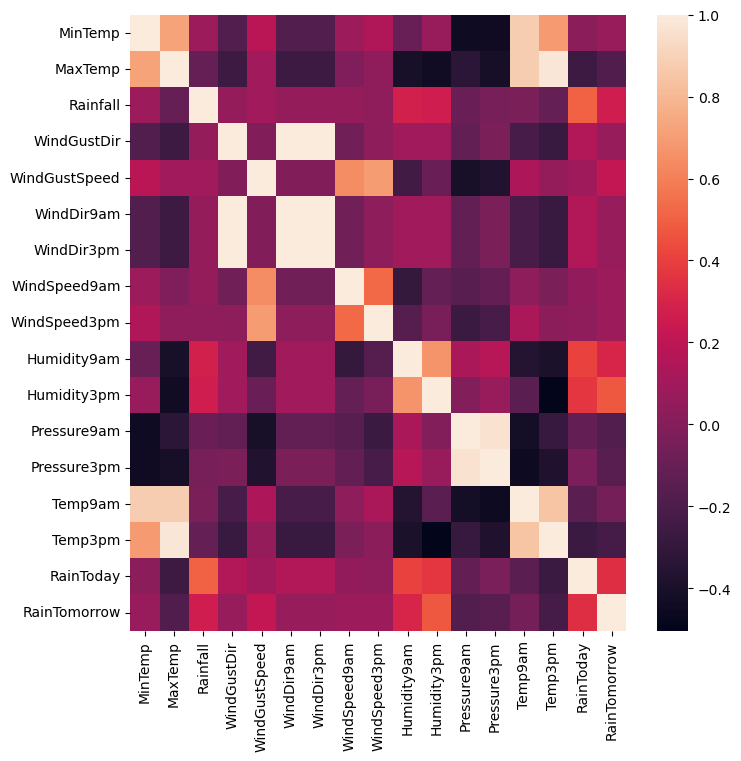

In [21]:
#Heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df.corr())
plt.show()

as we can see that in heatmap rain tomorrow on humidity3pm is good relationship to going rain tomorrow

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [24]:
lr=LogisticRegression() #Logistic Regression
knn=KNeighborsClassifier() #KNearest Neibour 
rf=RandomForestClassifier() # Random Forest
svm=SVC()              # support vactor classifier        
gd=GradientBoostingClassifier() #Gradient Boosting Classifier
dt=DecisionTreeClassifier() #Decision Tree Classifier

model=[lr,knn,rf,svm,gd,dt]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    print(m)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('-'*100)
    print('\n')

LogisticRegression()
Accuracy score of LogisticRegression() is:
0.8413575374901342
[[914  50]
 [151 152]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       964
           1       0.75      0.50      0.60       303

    accuracy                           0.84      1267
   macro avg       0.81      0.72      0.75      1267
weighted avg       0.83      0.84      0.83      1267

----------------------------------------------------------------------------------------------------


KNeighborsClassifier()
Accuracy score of KNeighborsClassifier() is:
0.8382004735595896
[[905  59]
 [146 157]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       964
           1       0.73      0.52      0.61       303

    accuracy                           0.84      1267
   macro avg       0.79      0.73      0.75      1267
weighted avg       0.83      0.84      0.83      1267

---------------------------

I got 91 percent accuracy for random forest classifier. I think it's best model for our dataset.

In [25]:
#saving model
import pickle
raintomorrow_model = 'raintomorrow_model.pickle'
pickle.dump(rf,open(raintomorrow_model,'wb'))

# Rainfall Prediction

In [26]:
df=pd.read_csv('Rainfall.csv')
df=pd.DataFrame(data=df)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [27]:
df.tail().transpose()

,8420,8421,8422,8423,8424
Date,2017-06-21,2017-06-22,2017-06-23,2017-06-24,2017-06-25
Location,Uluru,Uluru,Uluru,Uluru,Uluru
MinTemp,2.8,3.6,5.4,7.8,14.9
MaxTemp,23.4,25.3,26.9,27.0,NaN
Rainfall,0.0,0.0,0.0,0.0,0.0
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,E,NNW,N,SE,NaN
WindGustSpeed,31.0,22.0,37.0,28.0,NaN
WindDir9am,SE,SE,SE,SSE,ESE


In [28]:
df.sample()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6545,2012-03-21,Brisbane,19.4,28.3,3.4,5.0,2.6,ESE,22.0,ESE,...,76.0,73.0,1009.4,1005.7,7.0,7.0,24.5,25.3,Yes,No


In [29]:
df=df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm','Location','Date'],axis=1)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [30]:
df=df.dropna(axis=0)
df.shape

(6332, 17)

In [31]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [32]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindGustDir'])
df['WindDir3pm'] = le.fit_transform(df['WindGustDir'])
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

In [34]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13,44.0,13,13,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,14,44.0,14,14,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,15,46.0,15,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,4,24.0,4,4,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,13,41.0,13,13,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [48]:
# target data separted from another data
X=df.drop(['Rainfall'],axis=1)
Y=df['Rainfall']

In [49]:
X.head()

,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,13,44.0,13,13,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,14,44.0,14,14,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,15,46.0,15,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,4,24.0,4,4,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,13,41.0,13,13,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [50]:
Y.head()

0    0.6
1    0.0
2    0.0
3    0.0
4    1.0
Name: Rainfall, dtype: float64

In [51]:
X.shape

(6332, 16)

In [52]:
Y.shape

(6332,)

separated target data and feature data

now let's see visualizations and relationships (feature data with target data)

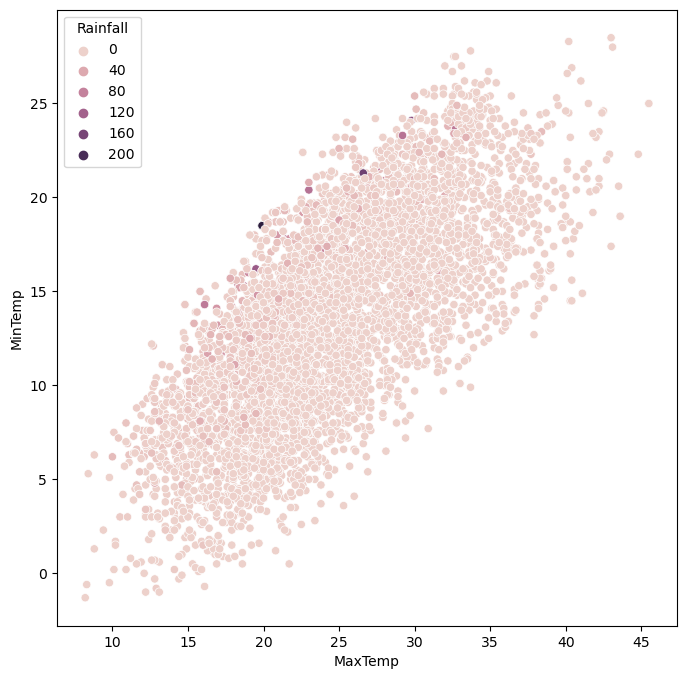

In [40]:
plt.figure(figsize=(8,8))

sns.scatterplot(x='MaxTemp',y='MinTemp',hue='Rainfall',data=df)
plt.show()

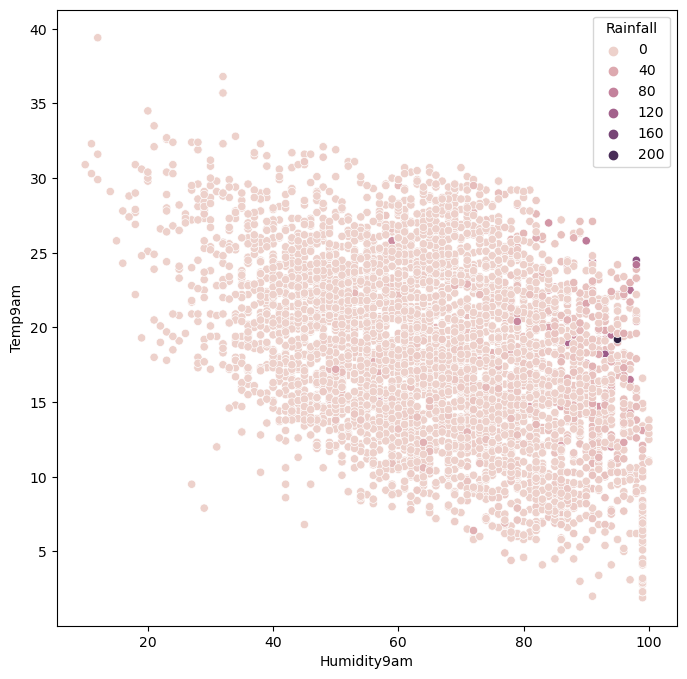

In [41]:
plt.figure(figsize=(8,8))

sns.scatterplot(x='Humidity9am',y='Temp9am',hue='Rainfall',data=df)
plt.show()

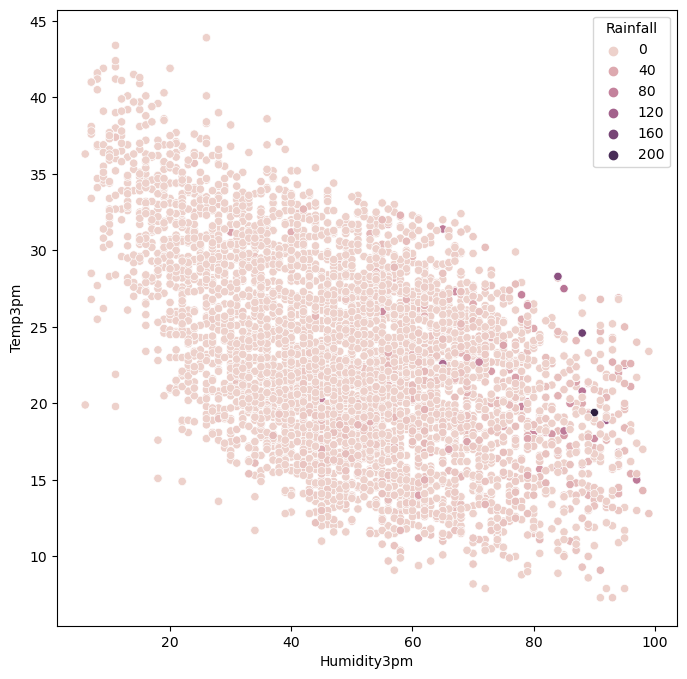

In [42]:
plt.figure(figsize=(8,8))

sns.scatterplot(x='Humidity3pm',y='Temp3pm',hue='Rainfall',data=df)
plt.show()

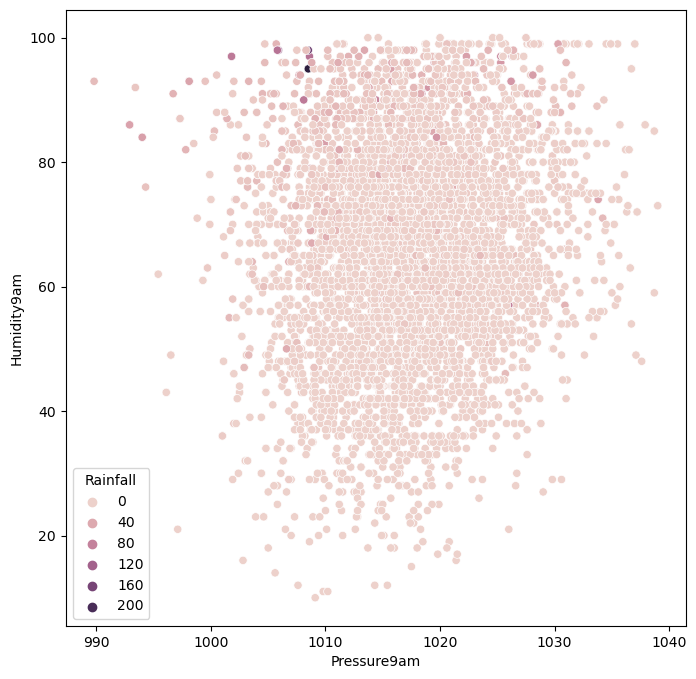

In [43]:
plt.figure(figsize=(8,8))

sns.scatterplot(x='Pressure9am',y='Humidity9am',hue='Rainfall',data=df)
plt.show()

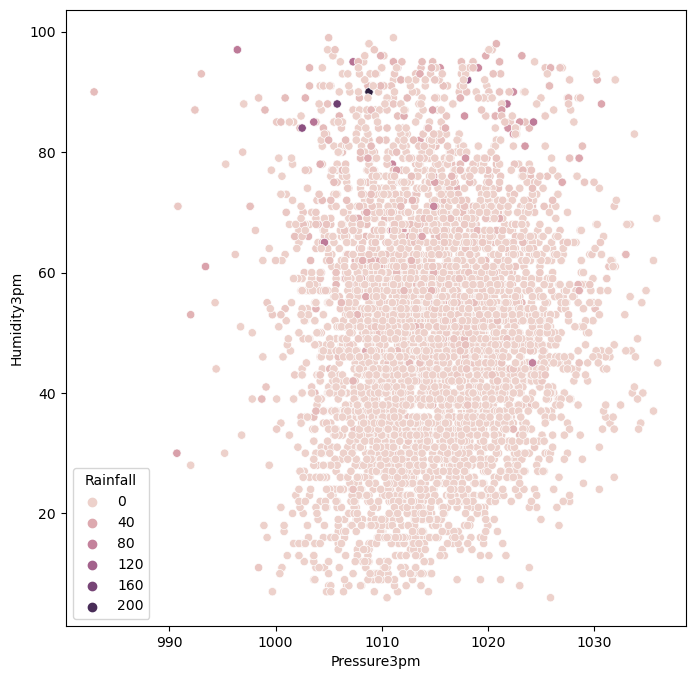

In [44]:
plt.figure(figsize=(8,8))

sns.scatterplot(x='Pressure3pm',y='Humidity3pm',hue='Rainfall',data=df)
plt.show()

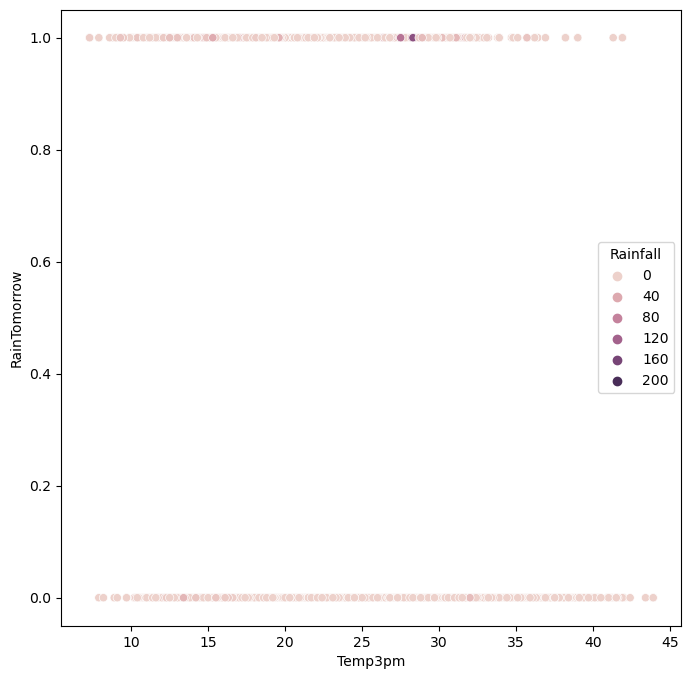

In [45]:
plt.figure(figsize=(8,8))

sns.scatterplot(x='Temp3pm',y='RainTomorrow',hue='Rainfall',data=df)
plt.show()

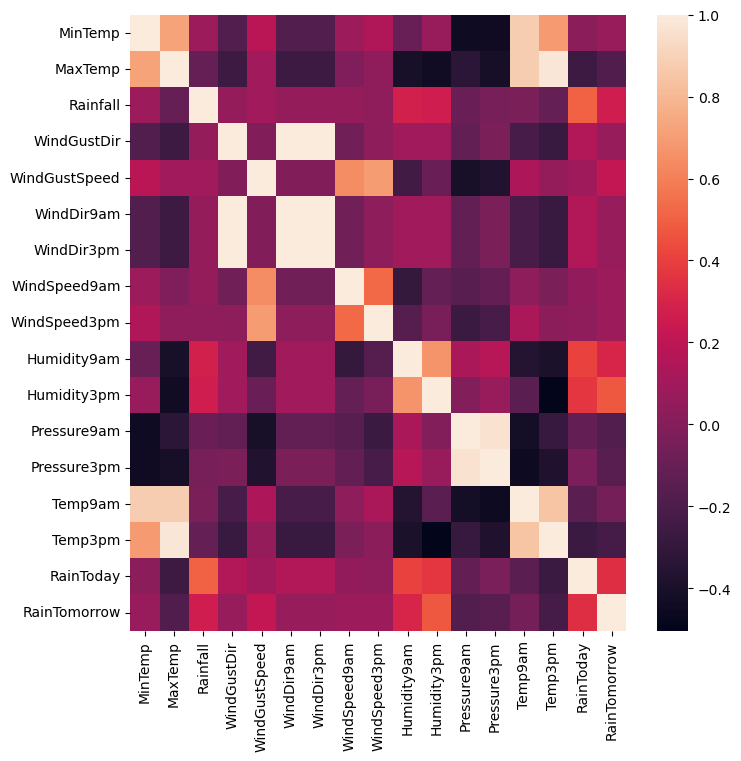

In [46]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr())
plt.show()

<AxesSubplot:>

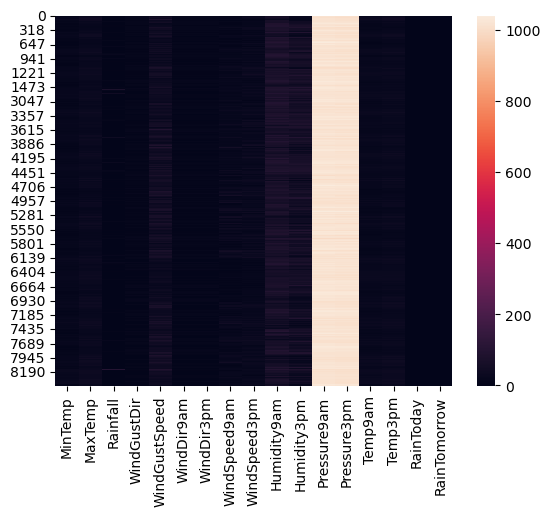

In [47]:
sns.heatmap(data=df)

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=45)

In [56]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lrfit=lr.fit(X_train,Y_train)
pred=lr.predict(X_test)

from sklearn import metrics
print('R2 Value:',metrics.r2_score(Y_train,lrfit.predict(X_train)))

R2 Value: 0.31518445255901306


In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
RF_Model=RandomForestRegressor(n_estimators=650,random_state=650,min_samples_leaf=.0001)
RF_Model.fit(X_train,Y_train)
Y_predict=RF_Model.predict(X_test)
r2_score(Y_test,Y_predict)

0.46605933269698174

In [59]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(X_train,Y_train)
Y_predict=ET_Model.predict(X_test)


from sklearn.metrics import r2_score
r2_score(Y_test,Y_predict)

0.48265191300429533

In [60]:
#use pickle to save our model so that we can use it later
import pickle
pickle.dump(ET_Model,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))